In [52]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [53]:
qg=100*10**(-3)
qs= 0
tg= 6
delT = 0.1 #s (10Hz)
stepsize = delT
accl=20*10**(-3)
qm=0.5*(qg+qs)  # midposition
tm=tg/2         # mid-time


In [54]:
tb=0.5*tg-0.5*math.sqrt(((accl*tg**2)-4*(qg-qs))/(accl)) #blend time
tp=tg-tb                                                 #tg-tb
qb=qm-accl*tb*(tm-tb)                                    #blend position


In [55]:
tx = np.linspace(0,tb,int(1/delT))           # 0 <= t <= tb          -> 1st segment position 0 to tb
ty = np.linspace(tb,tp,int(1/delT))          # tb <= t <= (tg - tb)  -> 2nd segment position tb to tg-tb
tz = np.linspace(tp,tg,int(1/delT))
# tx = np.arange(0,tb,delT)            #1st segment time interval  0 to tb
# ty= np.arange(tb+delT,tp,delT)            #2nd segment time interval  tb to tg-tb
# tz= np.arange(tp,tg ,delT)          #3rd segment time interval  tg-tb to tg
t=np.concatenate((tx,ty,tz))


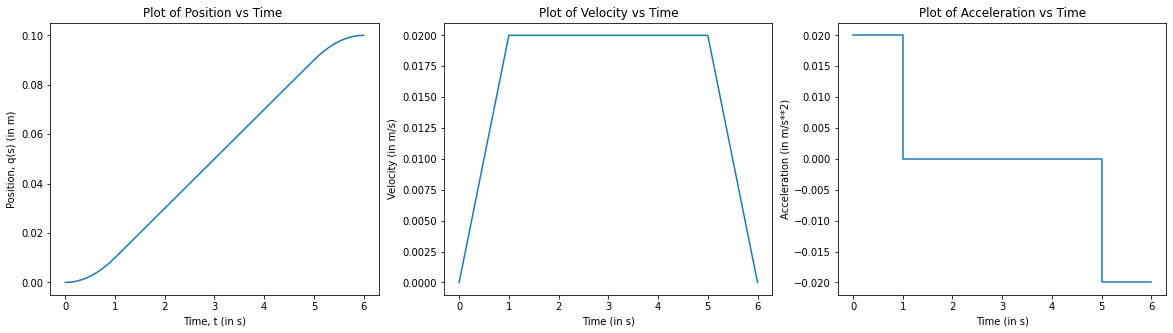

In [56]:
#Displacements
d1=qs + (0.5*accl*(tx**2))                       # 0 <= t <= tb  -> 1st segment position   0 to tb 
d2=qs + (0.5*accl*(tb**2)) + (accl*tb*(ty-tb))   # tb <= t <= (tg - tb) -> 2nd segment position  tb to tg-tb
d3=qg - (0.5*accl*((tg-tz)**2))                  #(tg - tb) <= t <= tg -> 3rd segment position  tg-tb to tg


d=np.concatenate((d1,d2,d3))

#Velocities
v1=accl*tx                         # 0 <= t <= tb  -> 1st segment velocity     0   to tb
v2=accl*tb*np.ones(ty.shape[0])    # tb <= t <= (tg - tb) -> 2nd segment velocity     tb  to tg-tb
v3=accl*(tg-tz)                    #(tg - tb) <= t <= tg -> 3rd segment velocity     tg-tb  to tg

v=np.concatenate((v1,v2,v3))

#Accelerations
a1=accl*np.ones(tx.shape[0])      # 0 <= t <= tb  -> 1st segment acceleration    0      to tb
a2=np.zeros(ty.shape[0])          # tb <= t <= (tg - tb) ->  2nd segment acceleration    tb     to tg-tb
a3=-accl*np.ones(tz.shape[0])     #(tg - tb) <= t <= tg -> 3rd segment acceleration    tg-tb  to tg
a =np.concatenate((a1,a2,a3))

fig, ax = plt.subplots(1,3)
fig.set_figwidth(20)
fig.set_figheight(5)

#Plot of Position vs Time 
ax[0].plot(t,d)
ax[0].set_title("Plot of Position vs Time ")
ax[0].set_ylabel('Position, q(s) (in m)')
ax[0].set_xlabel('Time, t (in s)')

#Plot of Velocity vs Time
ax[1].plot(t,v)
ax[1].set_title("Plot of Velocity vs Time")
ax[1].set_ylabel('Velocity (in m/s)')
ax[1].set_xlabel('Time (in s)')

#Plot of Acceleration vs Time
ax[2].plot(t,a)
ax[2].set_title("Plot of Acceleration vs Time")
ax[2].set_ylabel('Acceleration (in m/s**2)')
ax[2].set_xlabel('Time (in s)')

plt.savefig("Plots",dpi=150)
plt.show()

In [57]:
def generateSignals(n,amps,times,step_size):    
    vals = []
    for i in range(0,n):
        data = signal(times[i],amps[i],step_size)

        for d in data:
            vals.append(d)
    data = np.array(vals)
    X = data[:,0]
    Y = data[:,1]
    
    return X,Y
    
def signal(time,amp,step_size):
    a = [(time,0),(time,amp),(time+(step_size/2),amp),(time+(step_size/2),0),(time+step_size,0)]
    return a

In [58]:
n = t.shape[0]

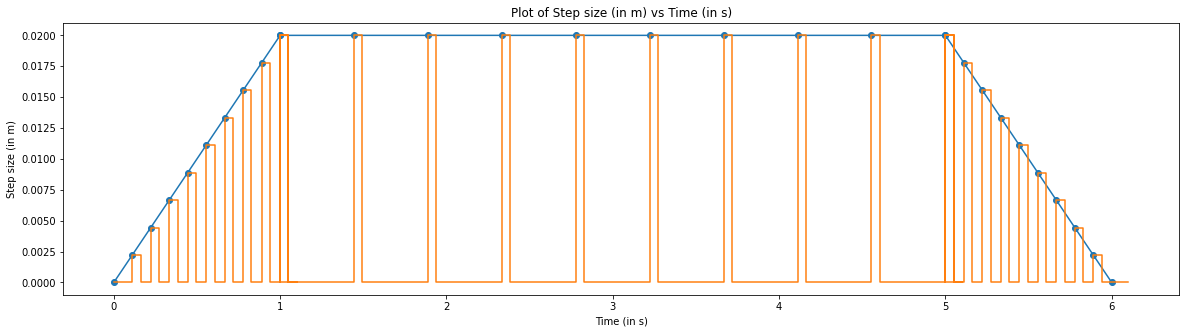

In [59]:
X,Y = generateSignals(n,v,t,stepsize)

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(5)
plt.plot(t,v)
plt.scatter(t,v)
plt.plot(X,Y)
plt.xlabel("Time (in s)")
plt.ylabel("Step size (in m)")
plt.title("Plot of Step size (in m) vs Time (in s)")
plt.savefig('plot.png',dpi=150)


In [60]:
qg = 100*10**-3
qs = 0
tg = 6
#Fs = 10000
accl = 20*10**-3
delT = .1 # (in s) (10Hz)
stepsize = delT
qm = 0.5*(qg + qs)                                         # midposition
tm = tg / 2                                                # mid-time
tb = 0.5 * tg - (0.5*np.sqrt(((accl*tg**2)-4*(qg-qs))/(accl))) # blend time
tp = tg - tb                                               # tg-tb
qb = qm - (accl * tb * (tm - tb))                          # blend position


#============= Square signal generator function #=============#

def signal(time,amplitude,step_size):
    sig = [
            [time                 ,     0],
            [time                 , amplitude],
            [time + (step_size/2) , amplitude],
            [time + (step_size/2) ,     0],
            [time +  step_size    ,     0],
        ]
    return sig

def generateSignal(n,amplitudes,time_stamps,step_size):
    points = np.zeros((5*n,2))
    num = 0

    for i in range(0,n):
        wave = signal(time_stamps[i],amplitudes[i],step_size)
        for j in range(0,len(wave)):
            points[int(num),:] = wave[j]
            num += 1

    X = points[:,0]
    Y = points[:,1]
    return X,Y


In [74]:
#=============================================== Time ===============================================#
tx = np.linspace(0,tb,int(1/delT))           # 0 <= t <= tb          -> 1st segment position 0 to tb
ty = np.linspace(tb,tp,int(1/delT))           # tb <= t <= (tg - tb)  -> 2nd segment position tb to tg-tb
tz = np.linspace(tp,tg,int(1/delT))            # (tg - tb) <= t <= tg  -> 3rd segment position tg-tb to tg

t = np.concatenate((tx,ty,tz))


#=============================================== Displacements ===============================================#
d1 = qs + 0.5*accl*(tx**2)                         # 0 <= t <= tb          -> 1st segment position 0 to tb
d2 = qs + (0.5*accl*(tb**2)) + (accl*tb*(ty-tb))   # tb <= t <= (tg - tb)  -> 2nd segment position tb to tg-tb
d3 = qg - (0.5*accl*((tg-tz)**2))                  # (tg - tb) <= t <= tg  -> 3rd segment position tg-tb to tg
d = np.concatenate((d1,d2,d3))



In [75]:

#=============================================== Velocities ===============================================#

v1 = accl*tx                         # 0 <= t <= tb          -> 1st segment position 0 to tb
v2 = accl*tb*np.ones(ty.shape[0])          # tb <= t <= (tg - tb)  -> 2nd segment position tb to tg-tb
v3 = accl*(tg-tz)                    # (tg - tb) <= t <= tg  -> 3rd segment position tg-tb to tg
v = np.concatenate((v1,v2,v3))



#p = polyfit(t,v,1)
#xlswrite('data.xlsx',p)

#=============================================== Accelerations ===============================================#

a1 = accl*np.ones(tx.shape[0])              #1st segment acceleration 0 to tb
a2 = 0*ty                             #2nd segment acceleration tb to tg-tb
a3 = -accl*np.ones(tz.shape[0])             #3rd segment acceleration tg-tb to tg
a = np.concatenate((a1,a2,a3))



# Generating square signal
n = len(t)
[X,Y]= generateSignal(n,v,t,stepsize)


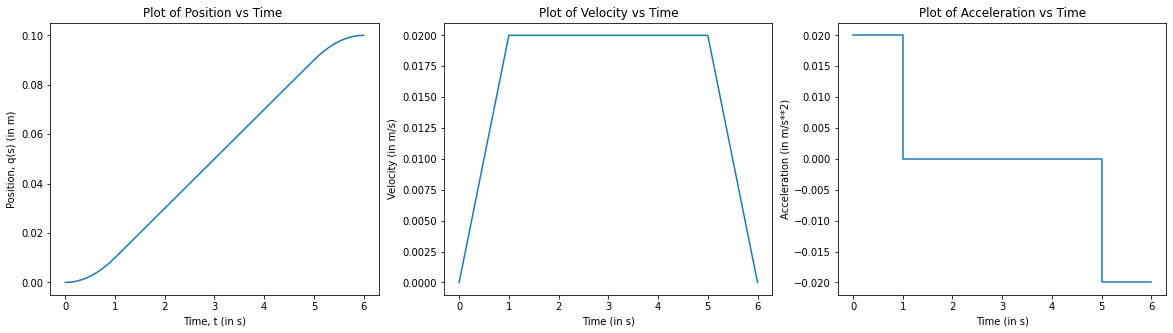

In [76]:
fig, ax = plt.subplots(1,3)
fig.set_figwidth(20)
fig.set_figheight(5)

#Plot of Position vs Time 
ax[0].plot(t,d)
ax[0].set_title("Plot of Position vs Time ")
ax[0].set_ylabel('Position, q(s) (in m)')
ax[0].set_xlabel('Time, t (in s)')

#Plot of Velocity vs Time
ax[1].plot(t,v)
ax[1].set_title("Plot of Velocity vs Time")
ax[1].set_ylabel('Velocity (in m/s)')
ax[1].set_xlabel('Time (in s)')

#Plot of Acceleration vs Time
ax[2].plot(t,a)
ax[2].set_title("Plot of Acceleration vs Time")
ax[2].set_ylabel('Acceleration (in m/s**2)')
ax[2].set_xlabel('Time (in s)')

plt.savefig("Plots",dpi=150)
plt.show()

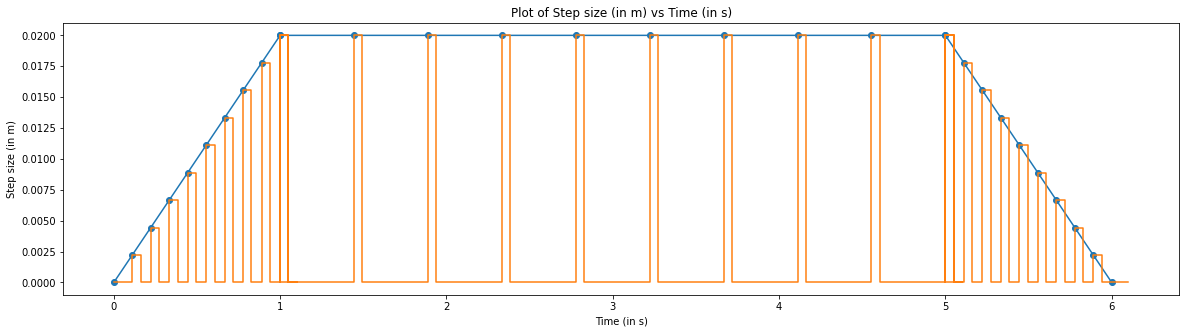

In [78]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(5)
plt.plot(t,v)
plt.scatter(t,v)
plt.plot(X,Y)
plt.xlabel("Time (in s)")
plt.ylabel("Step size (in m)")
plt.title("Plot of Step size (in m) vs Time (in s)")
plt.savefig('plot.png',dpi=150)


In [79]:
X

array([0.        , 0.        , 0.05      , 0.05      , 0.1       ,
       0.11111111, 0.11111111, 0.16111111, 0.16111111, 0.21111111,
       0.22222222, 0.22222222, 0.27222222, 0.27222222, 0.32222222,
       0.33333333, 0.33333333, 0.38333333, 0.38333333, 0.43333333,
       0.44444444, 0.44444444, 0.49444444, 0.49444444, 0.54444444,
       0.55555556, 0.55555556, 0.60555556, 0.60555556, 0.65555556,
       0.66666667, 0.66666667, 0.71666667, 0.71666667, 0.76666667,
       0.77777778, 0.77777778, 0.82777778, 0.82777778, 0.87777778,
       0.88888889, 0.88888889, 0.93888889, 0.93888889, 0.98888889,
       1.        , 1.        , 1.05      , 1.05      , 1.1       ,
       1.        , 1.        , 1.05      , 1.05      , 1.1       ,
       1.44444444, 1.44444444, 1.49444444, 1.49444444, 1.54444444,
       1.88888889, 1.88888889, 1.93888889, 1.93888889, 1.98888889,
       2.33333333, 2.33333333, 2.38333333, 2.38333333, 2.43333333,
       2.77777778, 2.77777778, 2.82777778, 2.82777778, 2.87777

In [80]:
Y

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00222222, 0.00222222, 0.        , 0.        ,
       0.        , 0.00444444, 0.00444444, 0.        , 0.        ,
       0.        , 0.00666667, 0.00666667, 0.        , 0.        ,
       0.        , 0.00888889, 0.00888889, 0.        , 0.        ,
       0.        , 0.01111111, 0.01111111, 0.        , 0.        ,
       0.        , 0.01333333, 0.01333333, 0.        , 0.        ,
       0.        , 0.01555556, 0.01555556, 0.        , 0.        ,
       0.        , 0.01777778, 0.01777778, 0.        , 0.        ,
       0.        , 0.02      , 0.02      , 0.        , 0.        ,
       0.        , 0.02      , 0.02      , 0.        , 0.        ,
       0.        , 0.02      , 0.02      , 0.        , 0.        ,
       0.        , 0.02      , 0.02      , 0.        , 0.        ,
       0.        , 0.02      , 0.02      , 0.        , 0.        ,
       0.        , 0.02      , 0.02      , 0.        , 0.     